## Data Analyzing

In [84]:
# Data processing, CSV file I/O
import pandas as pd
# Pandas display option so int & float values will not be shown in scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Pandas display option so output will be printed with all of the columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# Data visualization frameworks
import matplotlib.pyplot as plt
import seaborn as sns


Importing dataframes from preprocess.ipynb

In [85]:
df = pd.read_csv('preprocess.csv')
df_drop = pd.read_csv('df_drop.csv')
df_cuisine = pd.read_csv('cuisine.csv')
df_reason = pd.read_csv('reason.csv')

Analyzing data (From statistical view)

In [86]:
df.describe()

,age,gender,allowance_permonth,income_rp.0-rp.5.000.000,income_rp.5.000.000-rp.16.000.000,income_>_rp_30.000.000,prefer_not_to_answer,ordering_amount,spending_amount,goingout_amount,transportation,appetizer,dessert,main_course,availability_range_of_choice,comfort_convenience_dining_experience,deals_and_payment_option,price_cost,time_consumption,interest_output,expense_output
count,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00
mean,16.08,0.51,688916.67,0.03,0.11,0.14,0.72,1.90,332120.88,2.07,0.17,0.65,0.20,0.71,0.51,0.37,0.32,0.11,0.65,0.26,0.28
std,0.82,0.50,515954.13,0.17,0.31,0.35,0.45,1.36,198364.73,1.18,0.38,0.48,0.40,0.46,0.50,0.49,0.47,0.31,0.48,0.44,0.45
min,15.00,0.00,100000.00,0.00,0.00,0.00,0.00,0.00,40000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,15.00,0.00,300000.00,0.00,0.00,0.00,0.00,1.00,200000.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,16.00,1.00,600000.00,0.00,0.00,0.00,1.00,2.00,320000.00,2.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,17.00,1.00,800000.00,0.00,0.00,0.00,1.00,3.00,400000.00,2.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00
max,18.00,1.00,3000000.00,1.00,1.00,1.00,1.00,7.00,1000000.00,6.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [87]:
df_analyze_stats = pd.DataFrame(data=[[df['allowance_permonth'].sem(), df['allowance_permonth'].std(), df['allowance_permonth'].std() / df['allowance_permonth'].mean(), df['allowance_permonth'].mean()], [df['spending_amount'].sem(), df['spending_amount'].std(), df['spending_amount'].std() / df['spending_amount'].mean(), df['spending_amount'].mean()],[df['age'].sem(), df['age'].std(), df['age'].std() / df['age'].mean(), df['age'].mean()], [df['ordering_amount'].sem(), df['ordering_amount'].std(), df['ordering_amount'].std() / df['ordering_amount'].mean(), df['ordering_amount'].mean()],[df['goingout_amount'].sem(), df['goingout_amount'].std(), df['goingout_amount'].std() / df['goingout_amount'].mean(), df['goingout_amount'].mean()]], columns=['Standard error', 'Standard deviation', 'Coefficient of variation', 'mean'], index= ['allowance_permonth','spending_amount', 'age', 'ordering_amount', 'going_outamount'])
df_analyze_stats

,Standard error,Standard deviation,Coefficient of variation,mean
allowance_permonth,63996.23,515954.13,0.75,688916.67
spending_amount,24604.12,198364.73,0.60,332120.88
age,0.10,0.82,0.05,16.08
ordering_amount,0.17,1.36,0.71,1.90
going_outamount,0.15,1.18,0.57,2.07




printing out the correlation of every variables

In [88]:
# When variable meets the same variable, it's correlation coefficient will always be 1. However, this does not indicate a high correlation coefficient.
corr = df.corr(method='pearson')
corr

,age,gender,allowance_permonth,income_rp.0-rp.5.000.000,income_rp.5.000.000-rp.16.000.000,income_>_rp_30.000.000,prefer_not_to_answer,ordering_amount,spending_amount,goingout_amount,transportation,appetizer,dessert,main_course,availability_range_of_choice,comfort_convenience_dining_experience,deals_and_payment_option,price_cost,time_consumption,interest_output,expense_output
age,1.00,-0.21,-0.10,-0.02,-0.28,0.13,0.10,0.22,0.03,0.25,0.06,0.03,0.05,0.19,-0.02,0.05,0.02,0.09,-0.09,-0.01,-0.23
gender,-0.21,1.00,-0.02,-0.00,-0.15,-0.23,0.28,-0.06,0.07,-0.06,-0.13,0.11,0.26,-0.16,0.08,-0.27,-0.04,0.14,-0.09,-0.04,0.13
allowance_permonth,-0.10,-0.02,1.00,-0.02,-0.13,0.05,0.06,0.25,0.44,0.01,-0.12,0.09,-0.11,-0.11,-0.09,-0.10,-0.10,0.13,-0.06,-0.26,-0.16
income_rp.0-rp.5.000.000,-0.02,-0.00,-0.02,1.00,-0.06,-0.07,-0.29,-0.12,-0.03,-0.09,-0.08,-0.05,0.13,-0.08,-0.00,0.05,-0.12,-0.06,-0.05,-0.11,-0.11
income_rp.5.000.000-rp.16.000.000,-0.28,-0.15,-0.13,-0.06,1.00,-0.14,-0.56,-0.01,-0.06,-0.15,0.11,0.05,-0.17,0.01,0.04,0.04,0.18,-0.12,0.15,0.13,0.12
income_>_rp_30.000.000,0.13,-0.23,0.05,-0.07,-0.14,1.00,-0.65,-0.00,0.15,0.02,-0.06,0.02,-0.20,0.16,0.04,-0.12,0.10,0.15,0.02,-0.14,-0.05
prefer_not_to_answer,0.10,0.28,0.06,-0.29,-0.56,-0.65,1.00,0.06,-0.06,0.12,0.00,-0.03,0.22,-0.10,-0.06,0.05,-0.16,-0.01,-0.10,0.06,-0.00
ordering_amount,0.22,-0.06,0.25,-0.12,-0.01,-0.00,0.06,1.00,0.49,0.30,-0.10,-0.02,-0.22,0.28,-0.00,0.08,-0.05,0.10,0.10,0.02,-0.03
spending_amount,0.03,0.07,0.44,-0.03,-0.06,0.15,-0.06,0.49,1.00,0.09,-0.05,0.09,-0.29,0.10,0.03,0.11,-0.19,0.11,-0.05,-0.12,-0.04
goingout_amount,0.25,-0.06,0.01,-0.09,-0.15,0.02,0.12,0.30,0.09,1.00,-0.16,0.06,-0.09,0.30,0.11,-0.10,0.19,0.11,0.14,-0.00,-0.04


Let's see if there is any data that have a very high correlation (0.8 <= x <= 1)

In [89]:
high_positive_corr = corr[(corr > 0.8) & (corr != 1)]
high_positive_corr.count()

age                                      0
gender                                   0
allowance_permonth                       0
income_rp.0-rp.5.000.000                 0
income_rp.5.000.000-rp.16.000.000        0
income_>_rp_30.000.000                   0
prefer_not_to_answer                     0
ordering_amount                          0
spending_amount                          0
goingout_amount                          0
transportation                           0
appetizer                                0
dessert                                  0
main_course                              0
availability_range_of_choice             0
comfort_convenience_dining_experience    0
deals_and_payment_option                 0
price_cost                               0
time_consumption                         0
interest_output                          0
expense_output                           0
dtype: int64

In [90]:
high_negative_corr = corr[(corr < -0.8) & (corr != -1)]
high_negative_corr.count()

age                                      0
gender                                   0
allowance_permonth                       0
income_rp.0-rp.5.000.000                 0
income_rp.5.000.000-rp.16.000.000        0
income_>_rp_30.000.000                   0
prefer_not_to_answer                     0
ordering_amount                          0
spending_amount                          0
goingout_amount                          0
transportation                           0
appetizer                                0
dessert                                  0
main_course                              0
availability_range_of_choice             0
comfort_convenience_dining_experience    0
deals_and_payment_option                 0
price_cost                               0
time_consumption                         0
interest_output                          0
expense_output                           0
dtype: int64

Fortunately, there is no data that can be found to have a high correlation, therefore we can continue with our analyzing

Let's analzye further by using heatmap to know the general correlation between each variable

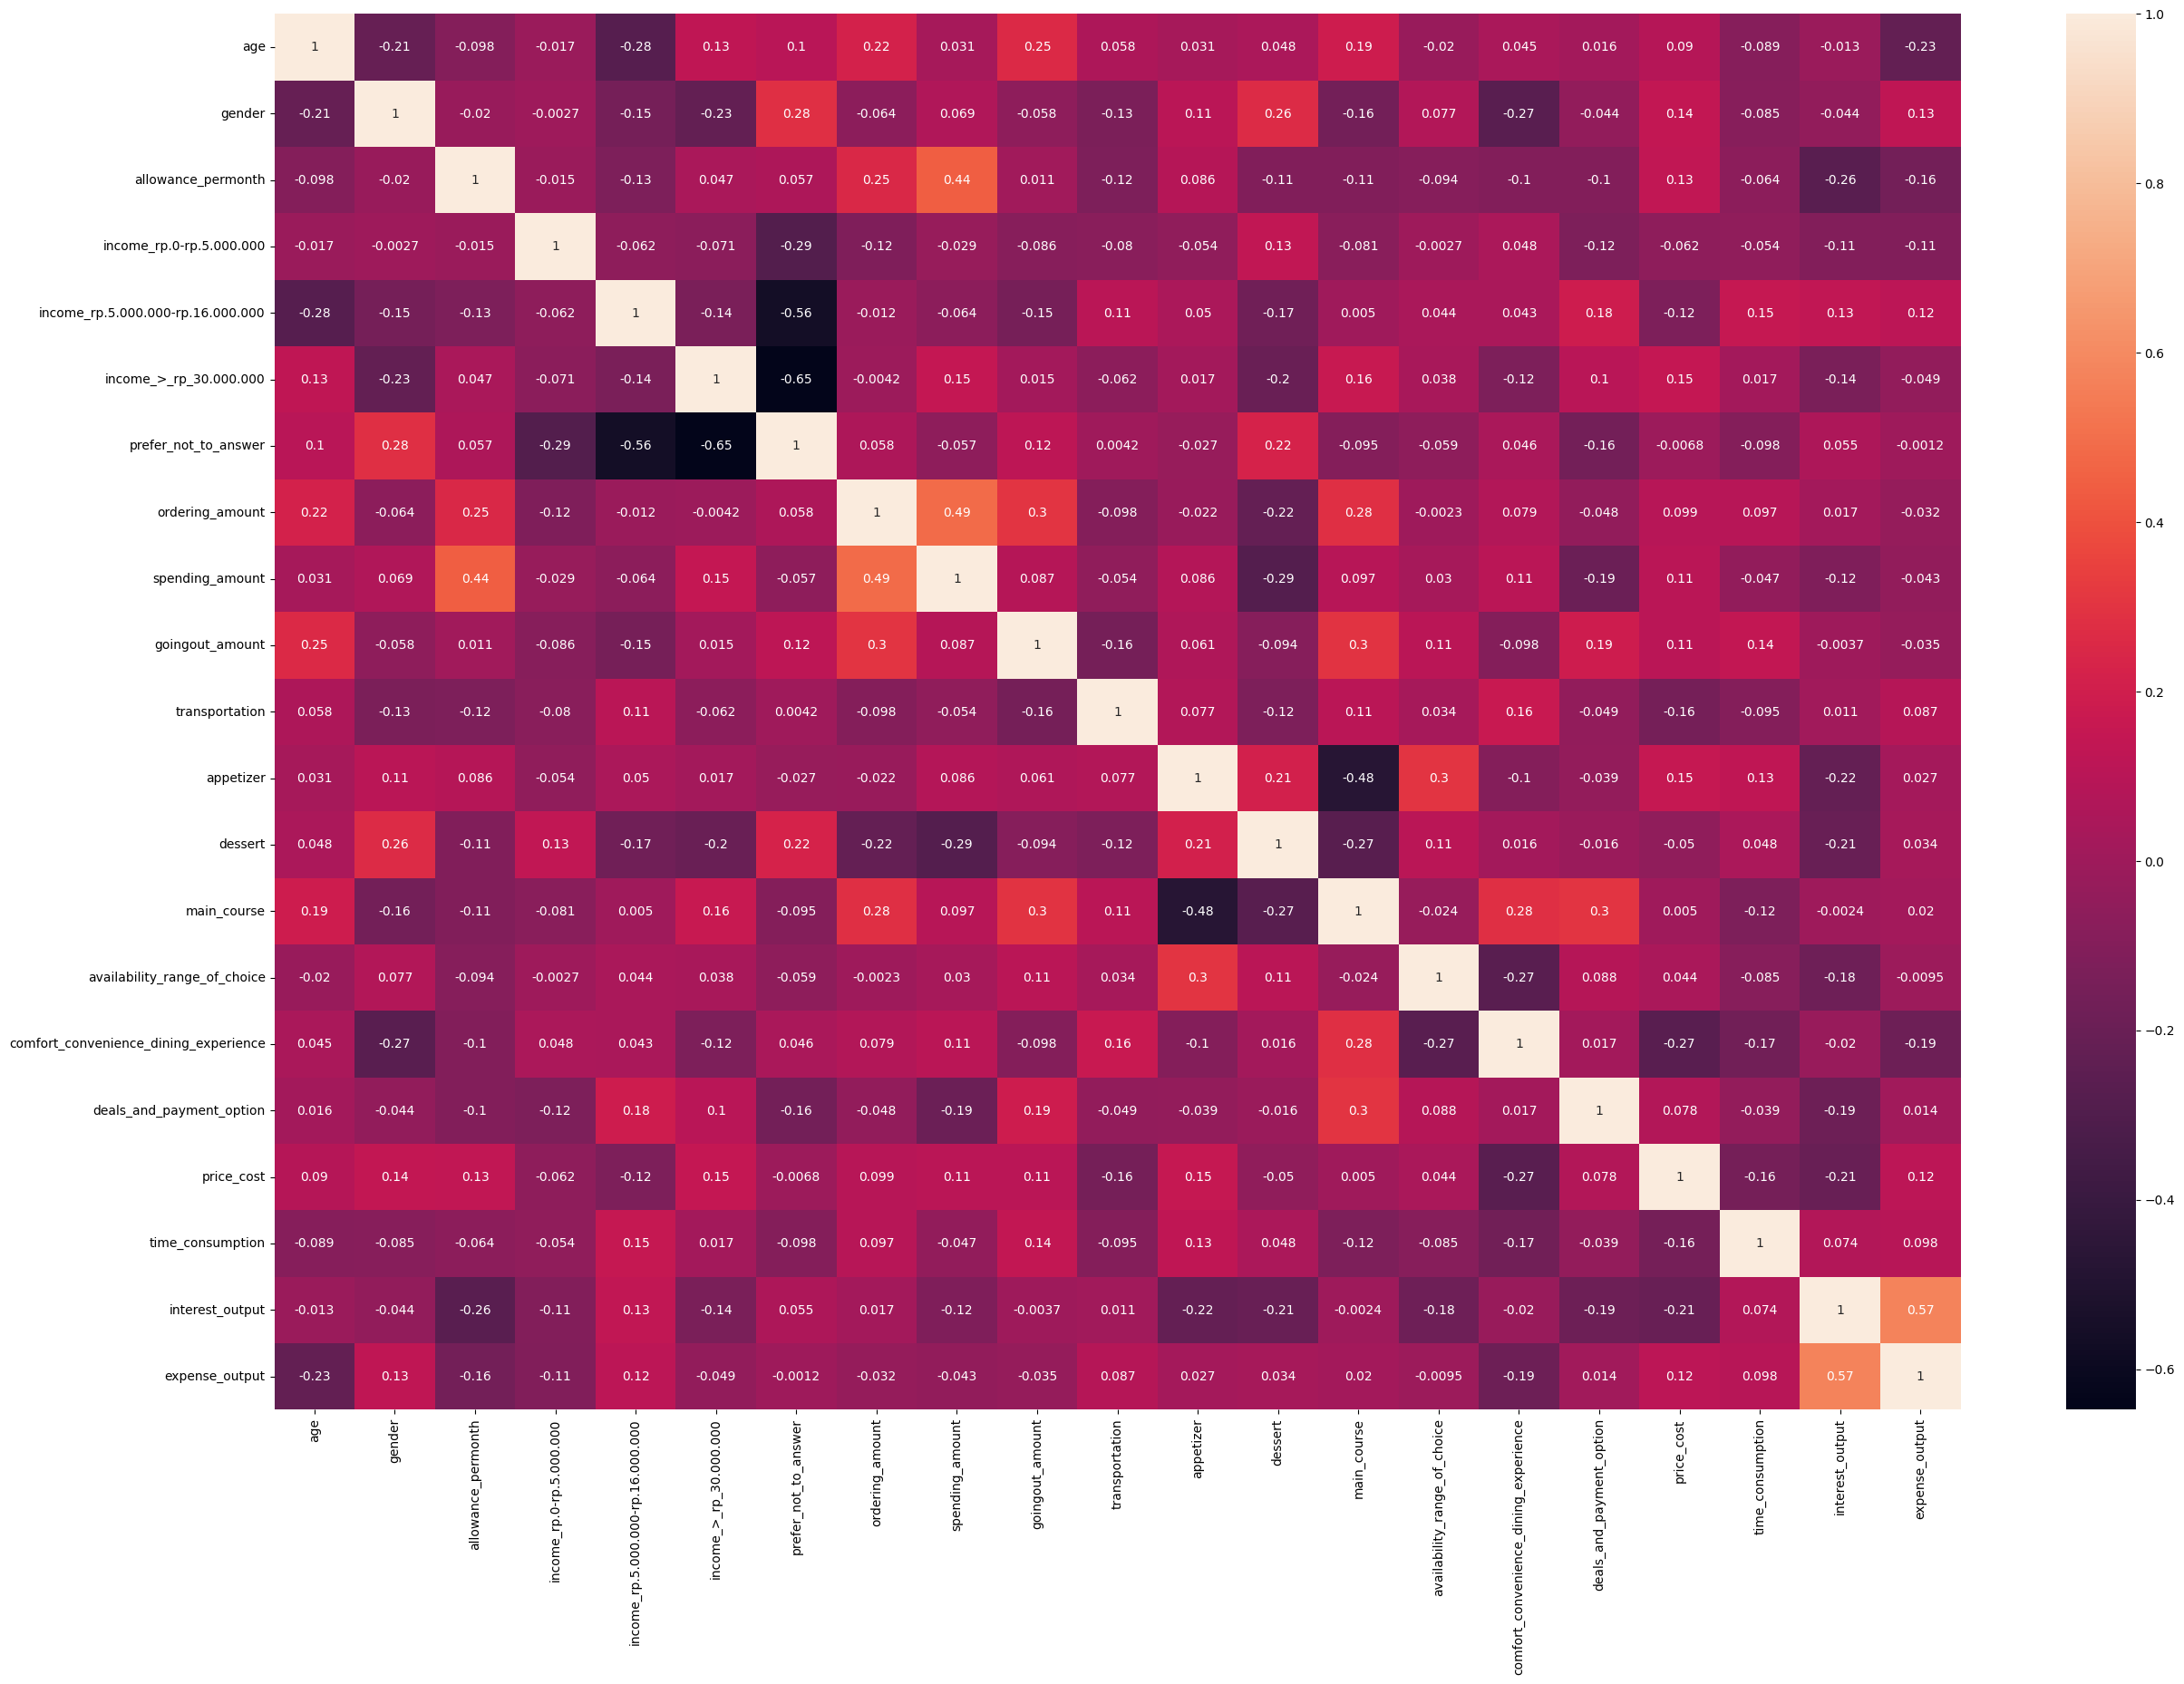

In [91]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot= True)
plt.savefig('foo.png')

### Conclusion
#### Statistical measurements
- Standard error refers to the degree of variability between a sample mean and the population mean. It provides an estimation of the amount of variation that could be expected in the sample mean if the study were repeated multiple times using new samples from the same population.
\
\
Describing standard error: compare the standard error to the mean, If the standard error is a large fraction of the mean, then it may be considered relatively high. 

- Standard deviation is a statistical measure that reflects how spread out a set of data is from its mean value. It is calculated by finding the square root of the variance, which is the average of the squared differences between each data point and the mean.A standard deviation is high or not depends on the specific context and purpose of the analysis.
\
\
Describing standard deviation: compare the standard deviation with the mean, which can be done with coefficient of variation.
- Coefficient of variation tells you how spread out the data is relative to the mean value. A higher coefficient of variation indicates a higher degree of variability, while a lower coefficient of variation indicates a lower degree of variability.
##### Correlation Coefficient
When two or more variables have a high correlation, it can indicate that they are strongly related to each other. This can have negative implications in certain situations. For example, in regression analysis, high correlation between independent variables can lead to multicollinearity, which can make it hard to interpret the effects of each variable on the dependent variable. 
\
\
It can take values between -1 and +1, where -1 denotes a perfectly negative correlation, 0 indicates no correlation, and +1 represents a perfect positive correlation. Negative correlation coefficient means that two variables are inversely related, meaning that as one variable increases, the other variable decreases, and vice versa.
\
\
In machine learning models, high correlation between features can lead to overfitting, which can result in poor generalization on new data. Highly correlated variables can also be redundant and can make the analysis more complicated. Additionally, using highly correlated variables can make it difficult to interpret the relationships between the variables and the outcome of the analysis. Therefore, it is important to consider the implications of high correlation and take appropriate actions accordingly.


##### Analyzing our numeric variables
##### allowance_permonth
From the data we've gathered that:
* Teenagers in Harapan Bangsa have much higher average allowance, with a mean of Rp. 650.000 while the average monthly pocket money in Indonesia is only about Rp. 150.000 - Rp. 250.000.
* The dispersion of allowance_permonth is a little bit high, parents may give their children different allowance from various factors such as behavior, grades, and age.
* The standard error of allowance_permonth is low, which states that it's certainty level of the data is high

##### spending_amount
* From the data we've gathered that:
* The correlation of variation is considered to be fairly high, we're expecting the CV to be small since every survey-takers should spend similarly on food.
* The standard error of spending_amount is smaller than allowance_permonth because it's output is influenced by the standard deviation

##### Age
Both CV and standard error of the age variable is very small. As we are expecting a answer from the same age group (teenagers)

##### ordering_amount and going_outamount
* Even though the mean of ordering_amount and going_outamount is similar, ordering_amount CV is higher comparing to going_outamount, indicating a stronger dispersion on it. 
* The standard error of both ordering_amount and going_outamount is considered to be small.

##### Correlation Coefficient
We've gathered that:
* There is no strong positive or negative correlation coefficient of every variable.
* Most variables have a weak correlation within each other, whether it's positive or negative values.
* There are only some values that have a fairly strong correlation within each each other.



##### Analyzing data (From graph)


In [92]:

df_analyze = df.copy()
df_analyze['interest_output'].replace([0,1],['Online','Offline'], inplace= True)
df_analyze['expense_output'].replace([0,1],['Online','Offline'], inplace= True)

##### Graph 1: Age
Let's see survey-takers age with countplot

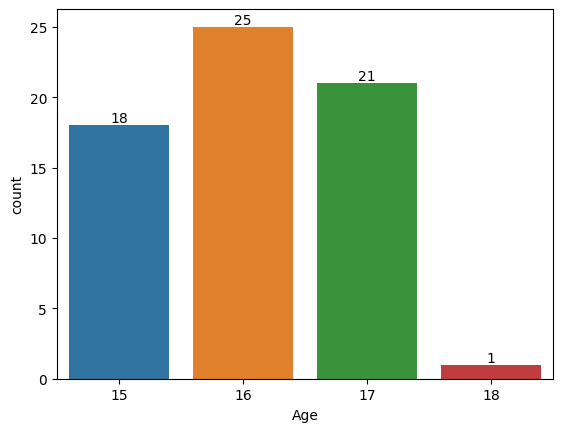

In [93]:
ax = sns.countplot(x=df_analyze['age'])
ax.set(xlabel= 'Age')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

##### Summary graph 1
We've found that most survey-takers is in the age of 16, catched up by 15 and 17. The range of survey-takers age are only from 15-18. 

##### Graph 2 & 3: Gender and outputs
Let's see survey-takers gender with it's correlation on the interest_output with a countplot

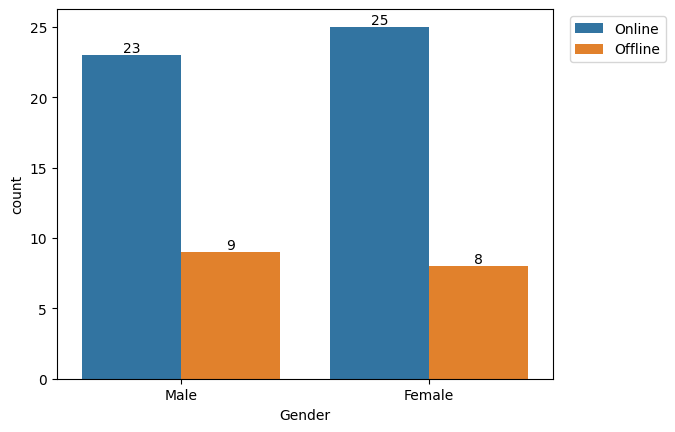

In [94]:
df_analyze['gender'].replace([0,1],['Male','Female'], inplace= True)
ax = sns.countplot(x ='gender', hue = "interest_output", data = df_analyze[['gender','interest_output']])
ax.set(xlabel= 'Gender')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()


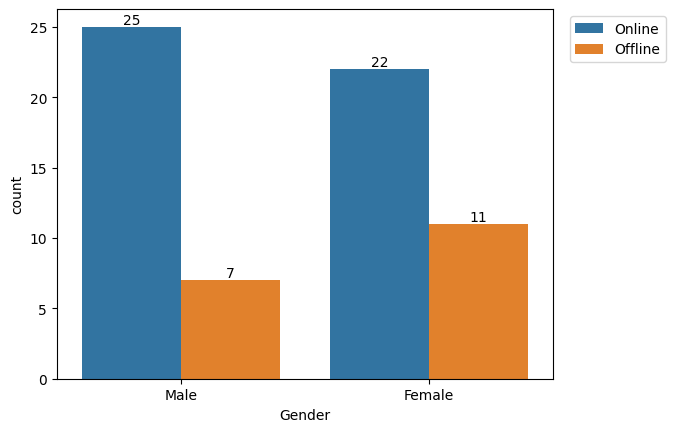

In [95]:
df_analyze['gender'].replace([0,1],['Male','Female'], inplace= True)
ax = sns.countplot(x ='gender', hue = "expense_output", data = df_analyze[['gender','expense_output']])
# sns.countplot(data = df_analyze[['gender','interest_output']], x='variable')
ax.set(xlabel= 'Gender')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

##### Summary graph 2 & 3
* Both genders prefer online food delivery services in both interest and expense
* The ratio of offline:online for both male and female for interest_output is the same
* The ratio of offline:online of male are much higher comparing to female, with a value of 0.29 for male and 0.52 for female

##### Graph 4: Income group
Income group. 
\
Asking about income on a survey can be a sensitive topic, as people may feel uncomfortable disclosing their financial information. Causing the respondent to skip the question or exit the survey entirely. Hence, a prefer not to answer choice will be included, however this choice will lower the predictive model performance
\
Let's see if the respondent answer their household income.

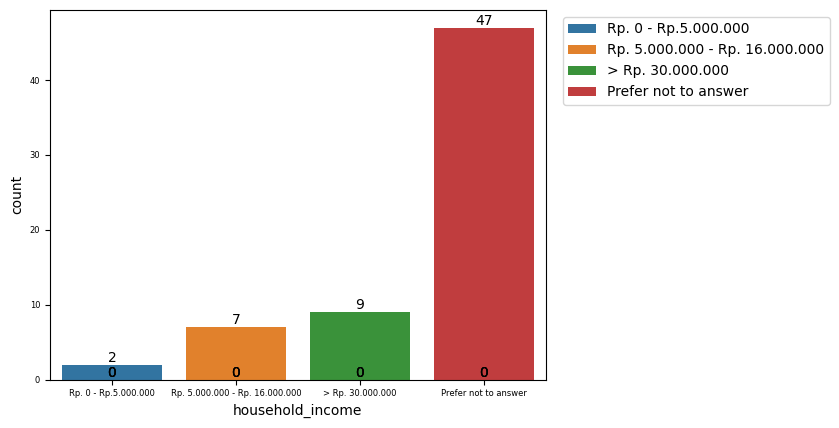

In [96]:
df_initial_analyze = df_drop.copy()
df_initial_analyze['household_income'] = pd.Categorical(df_initial_analyze['household_income'], categories=['Rp. 0 - Rp.5.000.000', 'Rp. 5.000.000 - Rp. 16.000.000', '> Rp. 30.000.000', 'Prefer not to answer'], ordered= True)
ax = sns.countplot(data = df_initial_analyze, x='household_income', hue='household_income', dodge=False)
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tick_params(labelsize = 6)
plt.show()

##### Summary graph 4
* Most of survey-takers chose to not answer their household income. 
* There is only 2 survey takers whose household income is Rp. 0 - Rp. 5.000.000. While Rp. 5.000.000 - Rp. 16.000.000 and > Rp.30.000.000 have a similar value

##### Graph 5 & 6: High household income and their output

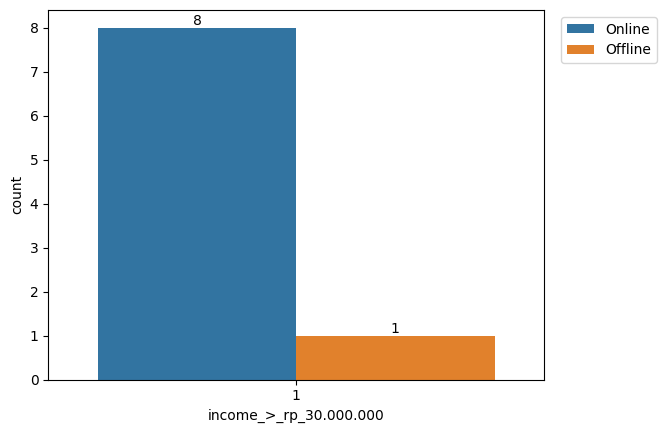

In [97]:
df_income_30 = df_analyze.loc[df_analyze['income_>_rp_30.000.000'] == 1]
ax = sns.countplot(data=df_income_30, x='income_>_rp_30.000.000', hue='interest_output')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()


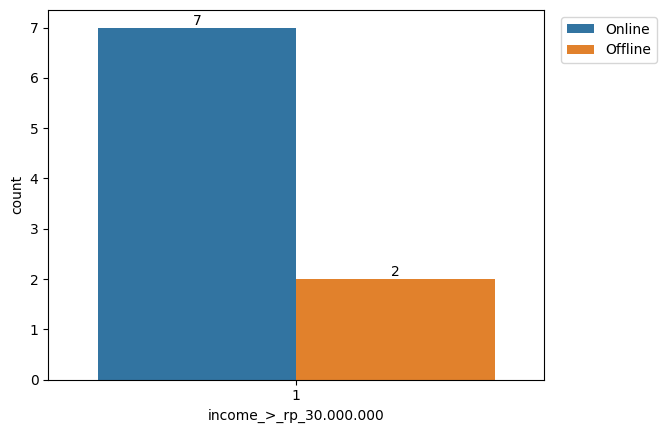

In [98]:
df_income_30 = df_analyze.loc[df_analyze['income_>_rp_30.000.000'] == 1]
ax = sns.countplot(data=df_income_30, x='income_>_rp_30.000.000', hue='expense_output')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

##### Summary graph 5 & 6
It seems that survey-takers with higher household income tends to choose online food delivery services rather than food takeout. Yet, the income class data that tell their household income is very small. Let's try to analyze by see the students allowance.

##### Graph 7 & 8: Students allowance and their outputs
Creating new dataframe for students who have their allowance above the allowance_permonth mean

In [99]:
df_above_allowance = df_analyze.loc[df_analyze['allowance_permonth'] > df_analyze['allowance_permonth'].mean()]
df_below_allowance = df_analyze.loc[df_analyze['allowance_permonth'] <= df_analyze['allowance_permonth'].mean()]

Creating the countplot

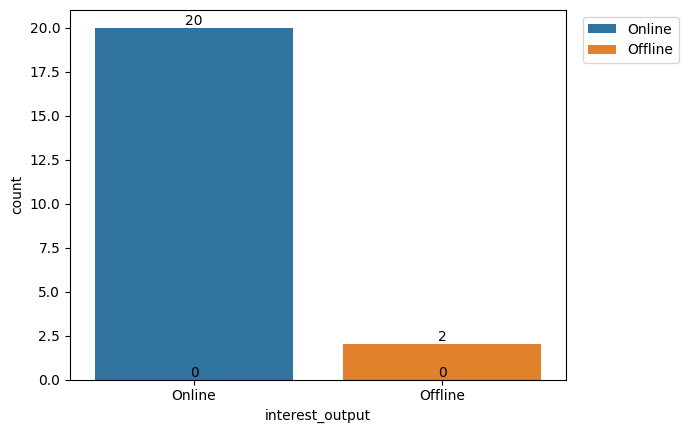

In [100]:
ax= sns.countplot(data=df_above_allowance, x='interest_output', hue= 'interest_output', dodge=False)
for container in ax.containers:
    ax.bar_label(container)
    plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

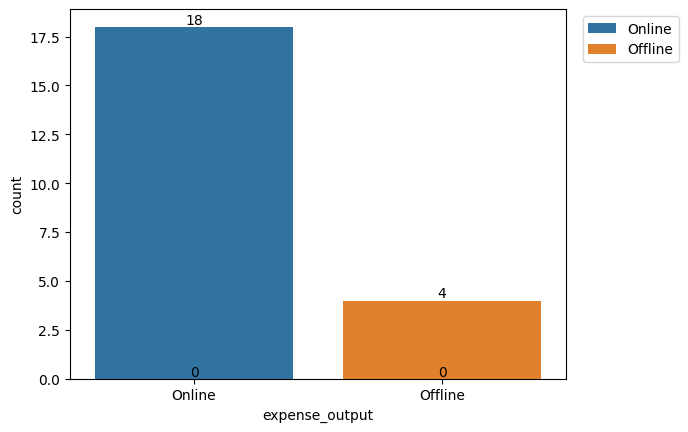

In [101]:
ax= sns.countplot(data=df_above_allowance, x='expense_output', hue= 'expense_output', dodge=False)
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

In [102]:
# df_allowance_output_result = pd.DataFrame({'interest_output':[len(df_above_allowance.loc[df_above_allowance['interest_output'] == 'Online']) / len(df_above_allowance), len(df_analyze.loc[df_analyze['interest_output'] == 'Online']) / len(df_analyze)], 'expense_output':[len(df_above_allowance.loc[df_above_allowance['expense_output'] == 'Online']) / len(df_above_allowance), len(df_analyze.loc[df_analyze['expense_output'] == 'Online']) / len(df_analyze)]}, index=['above mean', 'average'])
df_allowance_output_result = pd.DataFrame({
    'interest_output':[len(df_above_allowance.loc[df_above_allowance['interest_output'] == 'Online']) / len(df_above_allowance), len(df_below_allowance.loc[df_below_allowance['interest_output'] == 'Online']) / len(df_below_allowance)],
    'expense_output': [len(df_above_allowance.loc[df_above_allowance['expense_output'] == 'Online']) / len(df_above_allowance), len(df_below_allowance.loc[df_below_allowance['expense_output'] == 'Online']) / len(df_below_allowance)]
}, index=['above average', 'below average'])
df_allowance_output_result

,interest_output,expense_output
above average,0.91,0.82
below average,0.65,0.67


Let's see the percentage of survey-takers spend their allowance on food

In [103]:
percentage_allowance_spending = df_analyze['spending_amount'].mean() / df_analyze['allowance_permonth'].mean() * 100
print('The percentage of survey-takers spending their allowance on food is :', round(percentage_allowance_spending, 2), '%')

The percentage of survey-takers spending their allowance on food is : 48.21 %


##### Summmary graph 7 & 8
The percentage of teenage spending their allowance on food is 48.79 %, which is similar to the data that has been gathered by Sim (2019) which are 49.5%. While survey-takers allowance mean is above the average of teenagers in Indonesia that usually averages around Rp. 300.000, it seems allowance have a correlated value with the spending_amount.

##### Graph 9 & 10: students allowance and their spending habit on food

<AxesSubplot: xlabel='allowance_permonth', ylabel='Count'>

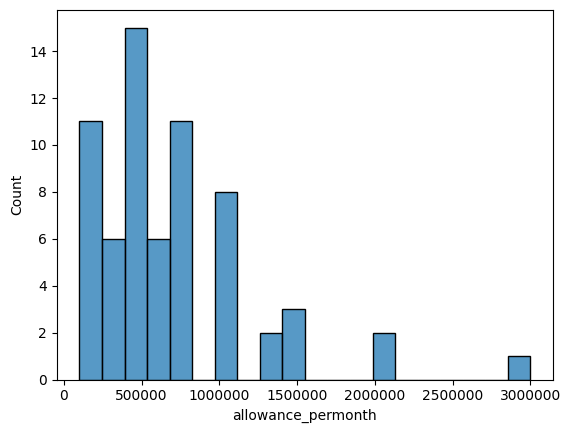

In [104]:
ax = sns.histplot(x= df_analyze['allowance_permonth'], bins=20)
plt.ticklabel_format(style='plain')
ax

Let's make a graph looking what students with their allowance on below the mean and above the mean choose.

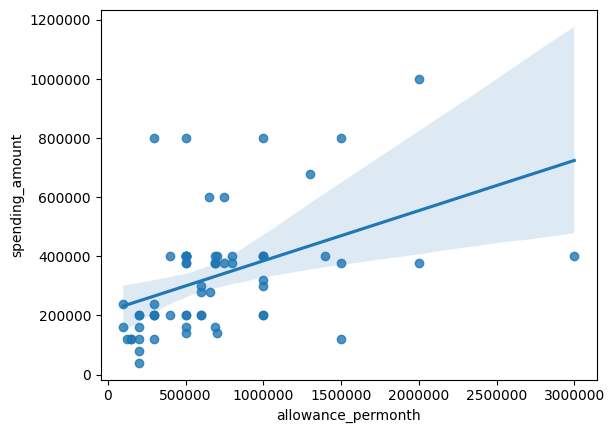

In [105]:
ax = sns.regplot(data=df_analyze, x='allowance_permonth', y='spending_amount')
plt.ticklabel_format(style='plain')
plt.show()

##### Summary 9 & 10
* The allowance_permonth has a slightly normally distributed value 
* There is a growing trend where the more allowance survey-takers has, the more they will spend on food. However, spending_amount will mostly be the same in the center distributed data as all normally distributed data will still spend on food

##### Graph 10: ordering_amount with their spending_amount

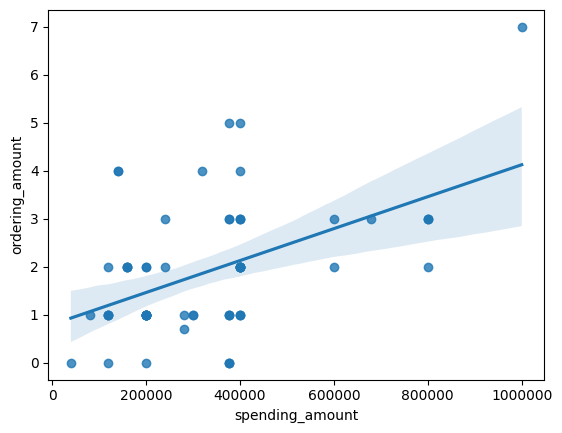

In [106]:
ax = sns.regplot(data = df_analyze, x='spending_amount', y='ordering_amount')
plt.ticklabel_format(style='plain')
plt.show()

Let's see the average amount of survey-takers spend per ordering

In [107]:
average_spending_per_ordering = df_analyze['spending_amount'].sum() / (df_analyze['ordering_amount'].sum() * 4)
round(average_spending_per_ordering)

43629

##### Summary graph 10
* There is a growing trend where the more ordering_amount survey-takers has, the more they will spend on food in total.
* On average, survey-takers spend Rp. 43.205 per ordering


##### Graph 11 & 12: Going out amount and their output

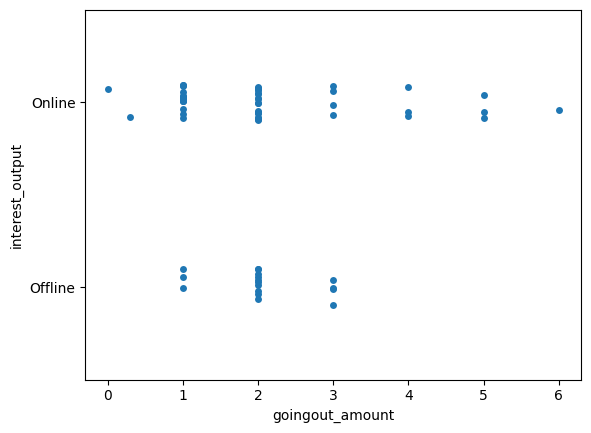

In [108]:
ax = sns.stripplot(data= df_analyze, y='interest_output', x='goingout_amount')
plt.show()

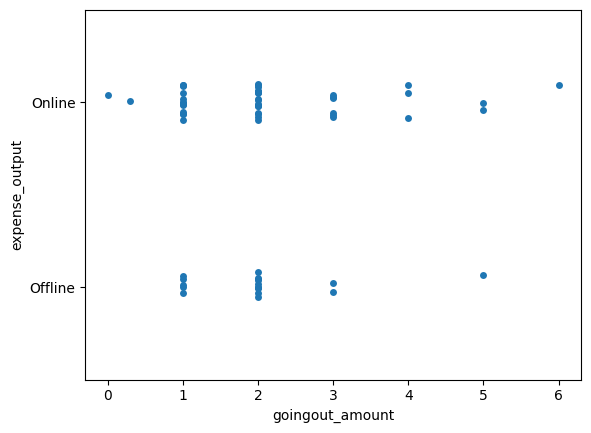

In [109]:
ax = sns.stripplot(data= df_analyze, y='expense_output', x='goingout_amount')
plt.show()

##### Summary Graph 11 & 12
* Survey-takers who choose online food delivery services for both interest and expense and a more disperse value than food takeout
* Both online food delivery services and food takeout have it's center value of 2 going out amount

##### Graph 13 , 14 & 15: Transportation and their output

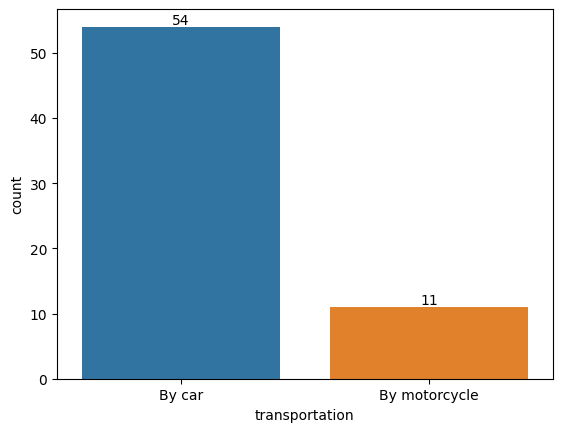

In [110]:
ax = sns.countplot(data=df_initial_analyze, x='transportation')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

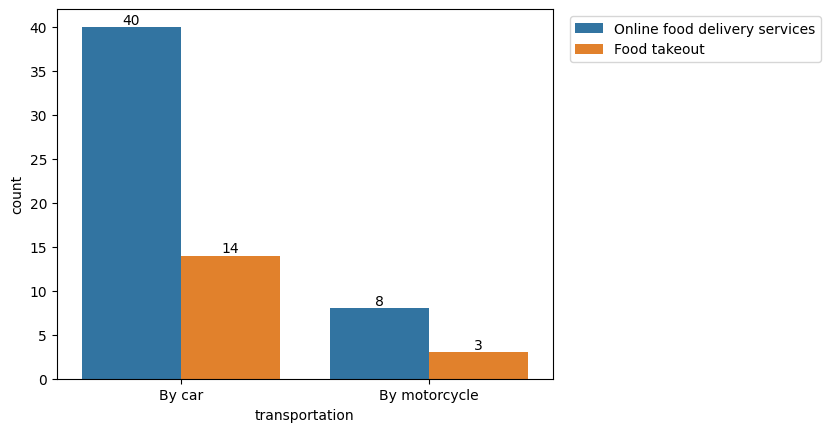

In [111]:
ax = sns.countplot(data= df_initial_analyze, x='transportation', hue='interest_output')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

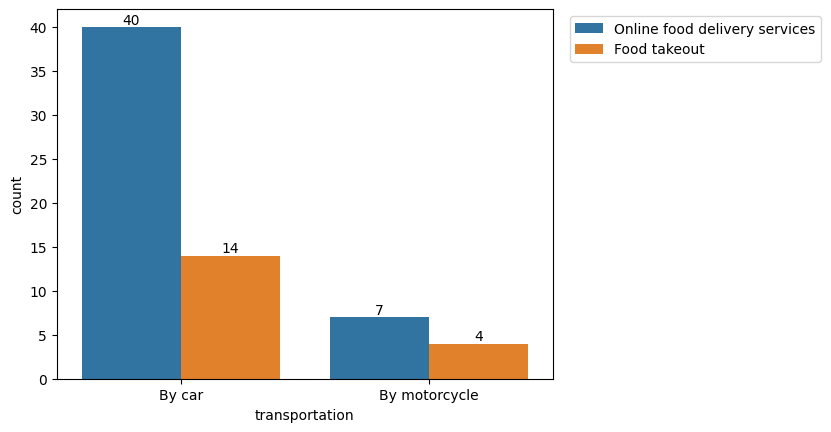

In [112]:
ax = sns.countplot(data= df_initial_analyze, x='transportation', hue='expense_output')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

##### Summary graph 13, 14 & 15
* Survey-takers mostly use car for their transportation, having a 4,7:1 ratio of car:motorcycle.
* Both output have similar amount of choices for each variable.
* While online:offline ratio for motorcycle in expense_output is larger, we can't assume since the data for it is too small.

##### Graph 16 & 17: Preferable Cuisine

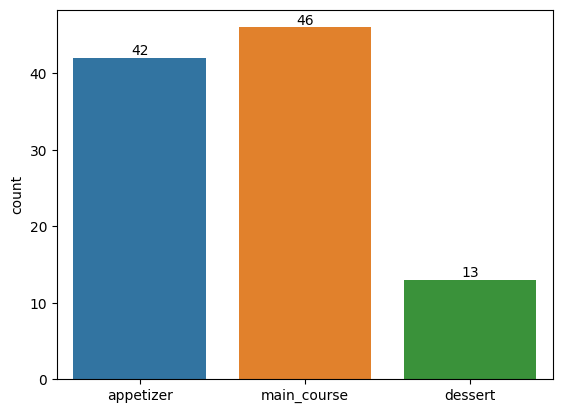

In [113]:
appetizer_count = 0
main_course_count = 0
dessert_count = 0
for i in range(len(df_cuisine)):
    if(df_cuisine['appetizer'][i] == 1):
        appetizer_count += 1
    if(df_cuisine['main_course'][i] == 1):
        main_course_count += 1
    if(df_cuisine['dessert'][i] == 1):
        dessert_count += 1
df_cuisine_result = pd.DataFrame({
    'count': [appetizer_count, main_course_count, dessert_count]}, index=['appetizer', 'main_course','dessert'])

ax = sns.barplot(data =df_cuisine_result, x=['appetizer', 'main_course','dessert'], y='count')
for container in ax.containers:
    ax.bar_label(container)
plt.show()



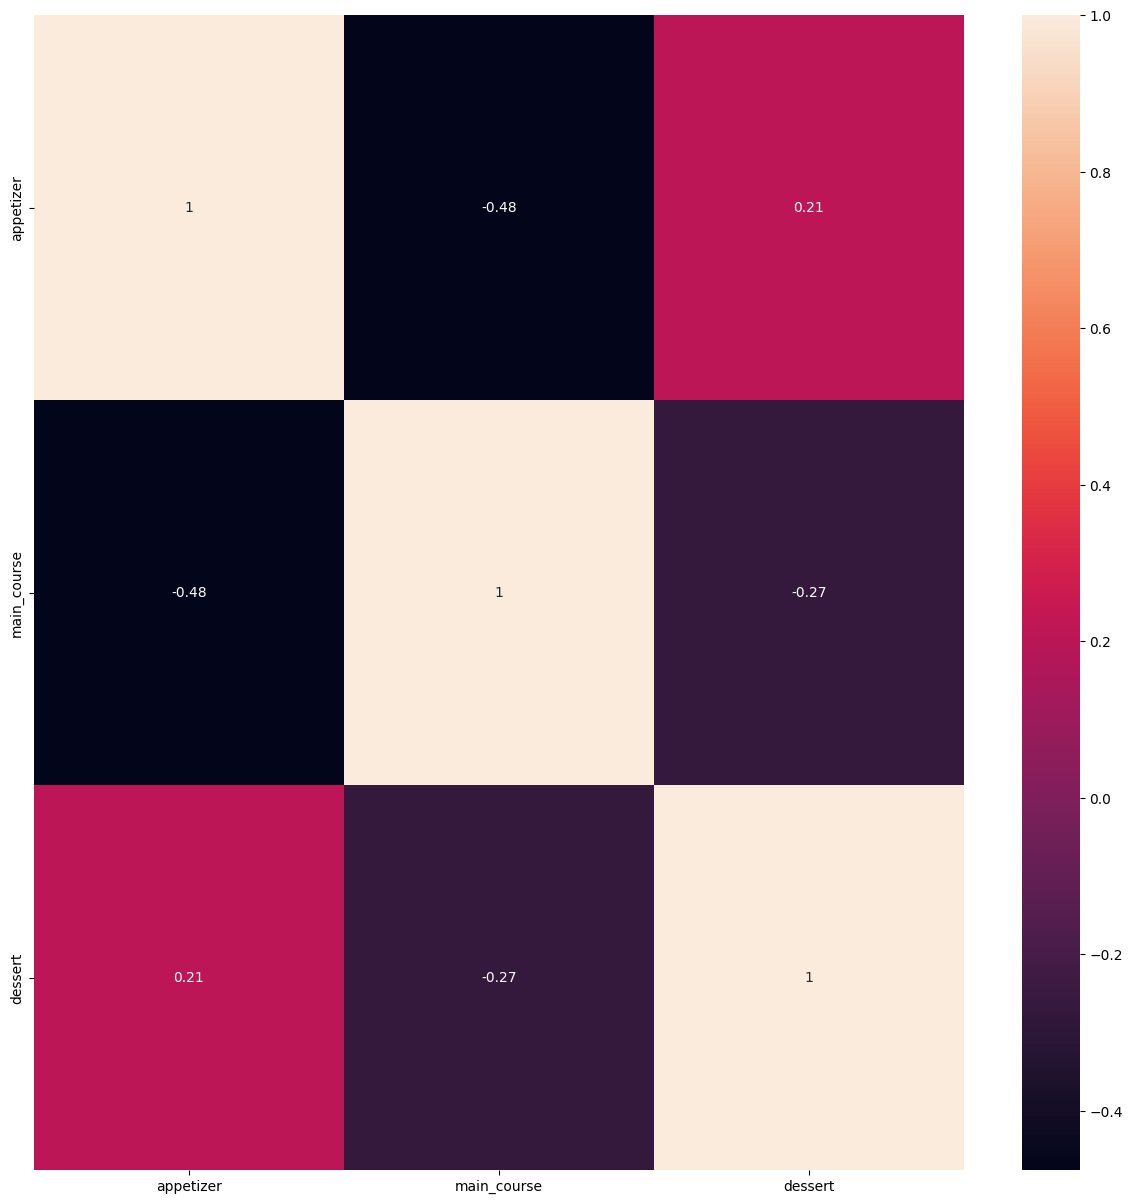

In [114]:
plt.figure(figsize=(15,15))
df_corr = df.corr()
df_cuisine_corr = df_corr[['appetizer', 'main_course', 'dessert']]
ax = sns.heatmap(df_cuisine_corr.loc[['appetizer','main_course', 'dessert' ]], annot=True)

##### Summary Graph 16 & 17
From the countplot, we've gathered that survey-takers tends to order mostly appetizer and dessert while main course are less likely to be bought.
\
\
From the heat map, we've gathered 3 values:
* Appetizer - Main course: 0.27. This indicate a fairly weak correlation, where survey-takers who tends to choose appetizer will also choose main course and vice versa.
* Appetizer - Dessert: -0.48. This indicate a fairly strong inversed correlation, where people who tends to choose appetizer would not choose dessert and vice versa.
* Main course - Dessert: -0.3.  This indicate a fairly weak inversed correlation, where people who tends to choose main course would not choose dessert and vice versa.



Graph 18, 19: Reason_output

In [115]:
# There are 5 variables for reason input as a whole: [availability_range_of_choice, comfort_convenience_dining_experience, deals_and_payment_option, price_cost, time_consumption]
availability_range_of_choice_count = 0
comfort_convenience_dining_experience_count = 0
deals_and_payment_option_count = 0
price_cost_count = 0
time_consumptioncount = 0
for i in range(len(df_reason)):
    if(df_reason['availability_range_of_choice'][i] == 1):
        availability_range_of_choice_count += 1
    if(df_reason['comfort_convenience_dining_experience'][i] == 1):
        comfort_convenience_dining_experience_count += 1
    if(df_reason['deals_and_payment_option'][i] == 1):
        deals_and_payment_option_count += 1
    if(df_reason['price_cost'][i] == 1):
        price_cost_count += 1
    if(df_reason['time_consumption'][i] == 1):
        time_consumptioncount += 1
df_reason_result = pd.DataFrame({
    'count': [availability_range_of_choice_count, comfort_convenience_dining_experience_count, deals_and_payment_option_count, price_cost_count, time_consumptioncount]}, index=['availability_range_of_choice_count', 'comfort_convenience_dining_experience_count','deals_and_payment_option_count', 'price_cost_count', 'time_consumptioncount'])


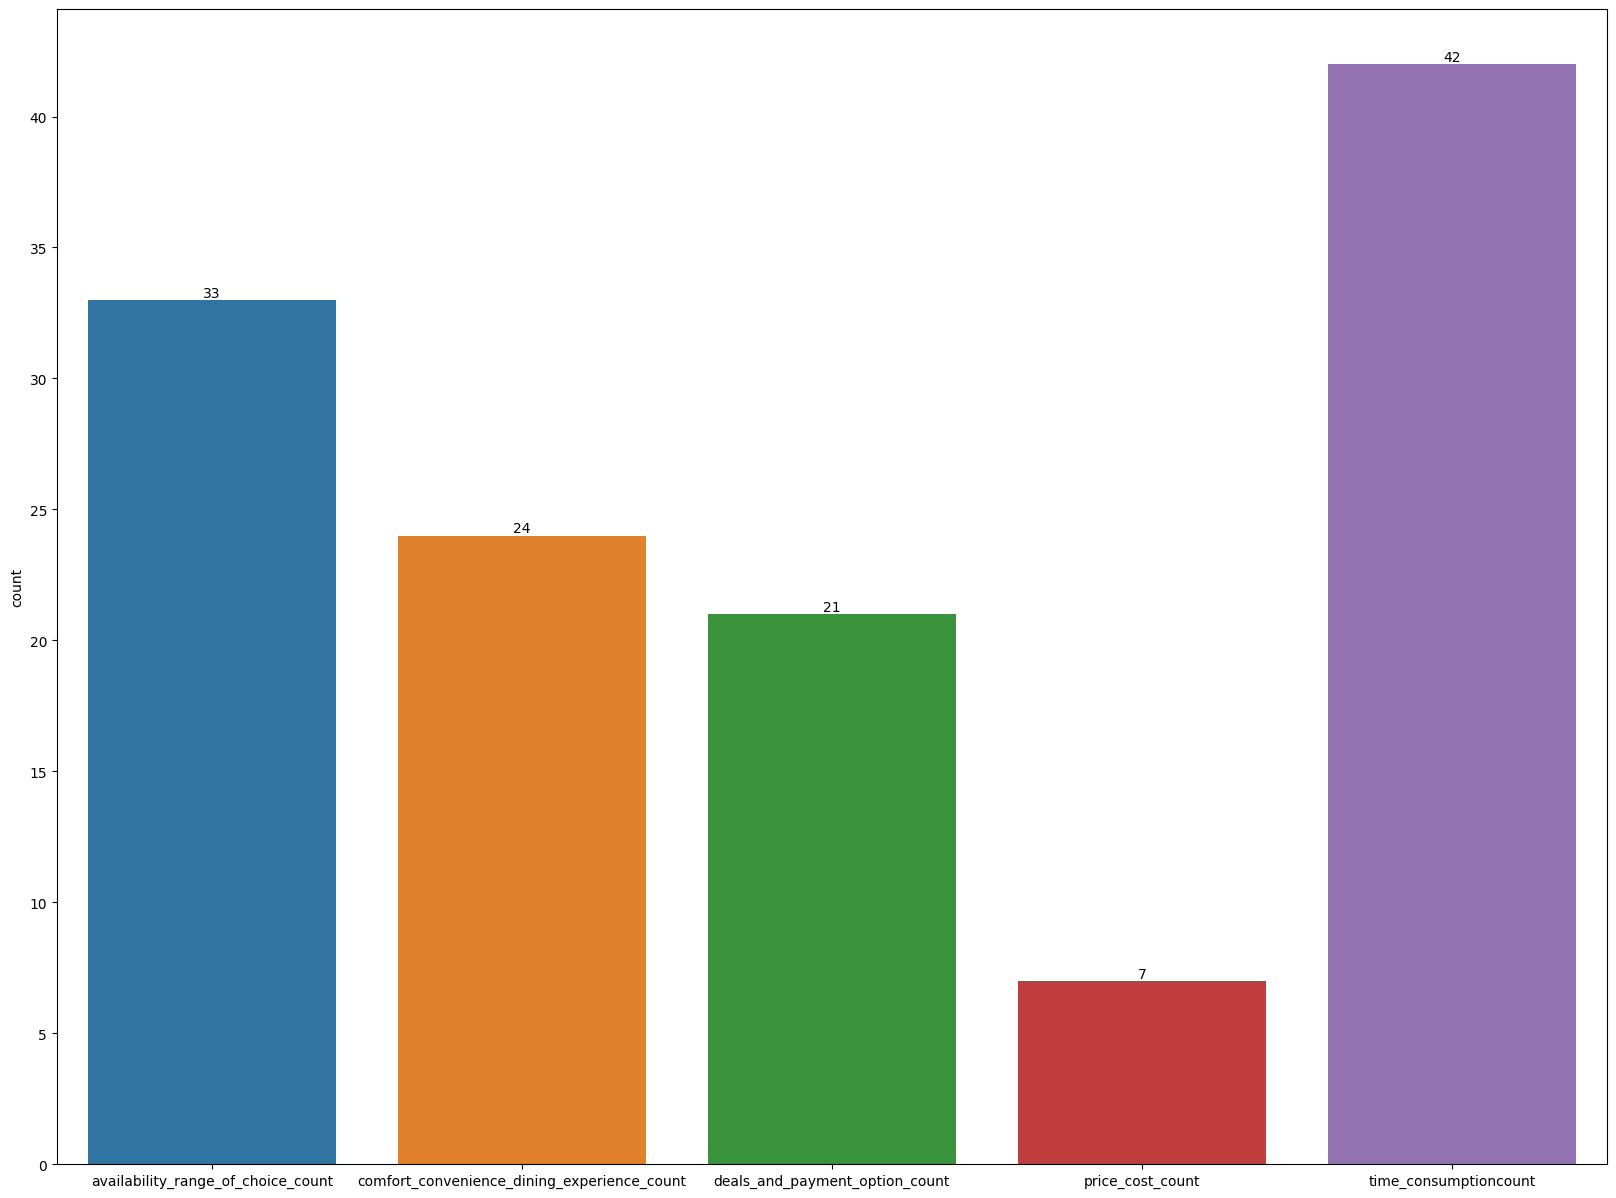

In [116]:
# Making a countplot
plt.figure(figsize=(20,15))
ax = sns.barplot(data =df_reason_result, x=['availability_range_of_choice_count', 'comfort_convenience_dining_experience_count', 'deals_and_payment_option_count', 'price_cost_count', 'time_consumptioncount'], y='count')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Let's make a heatmap for the reason variables

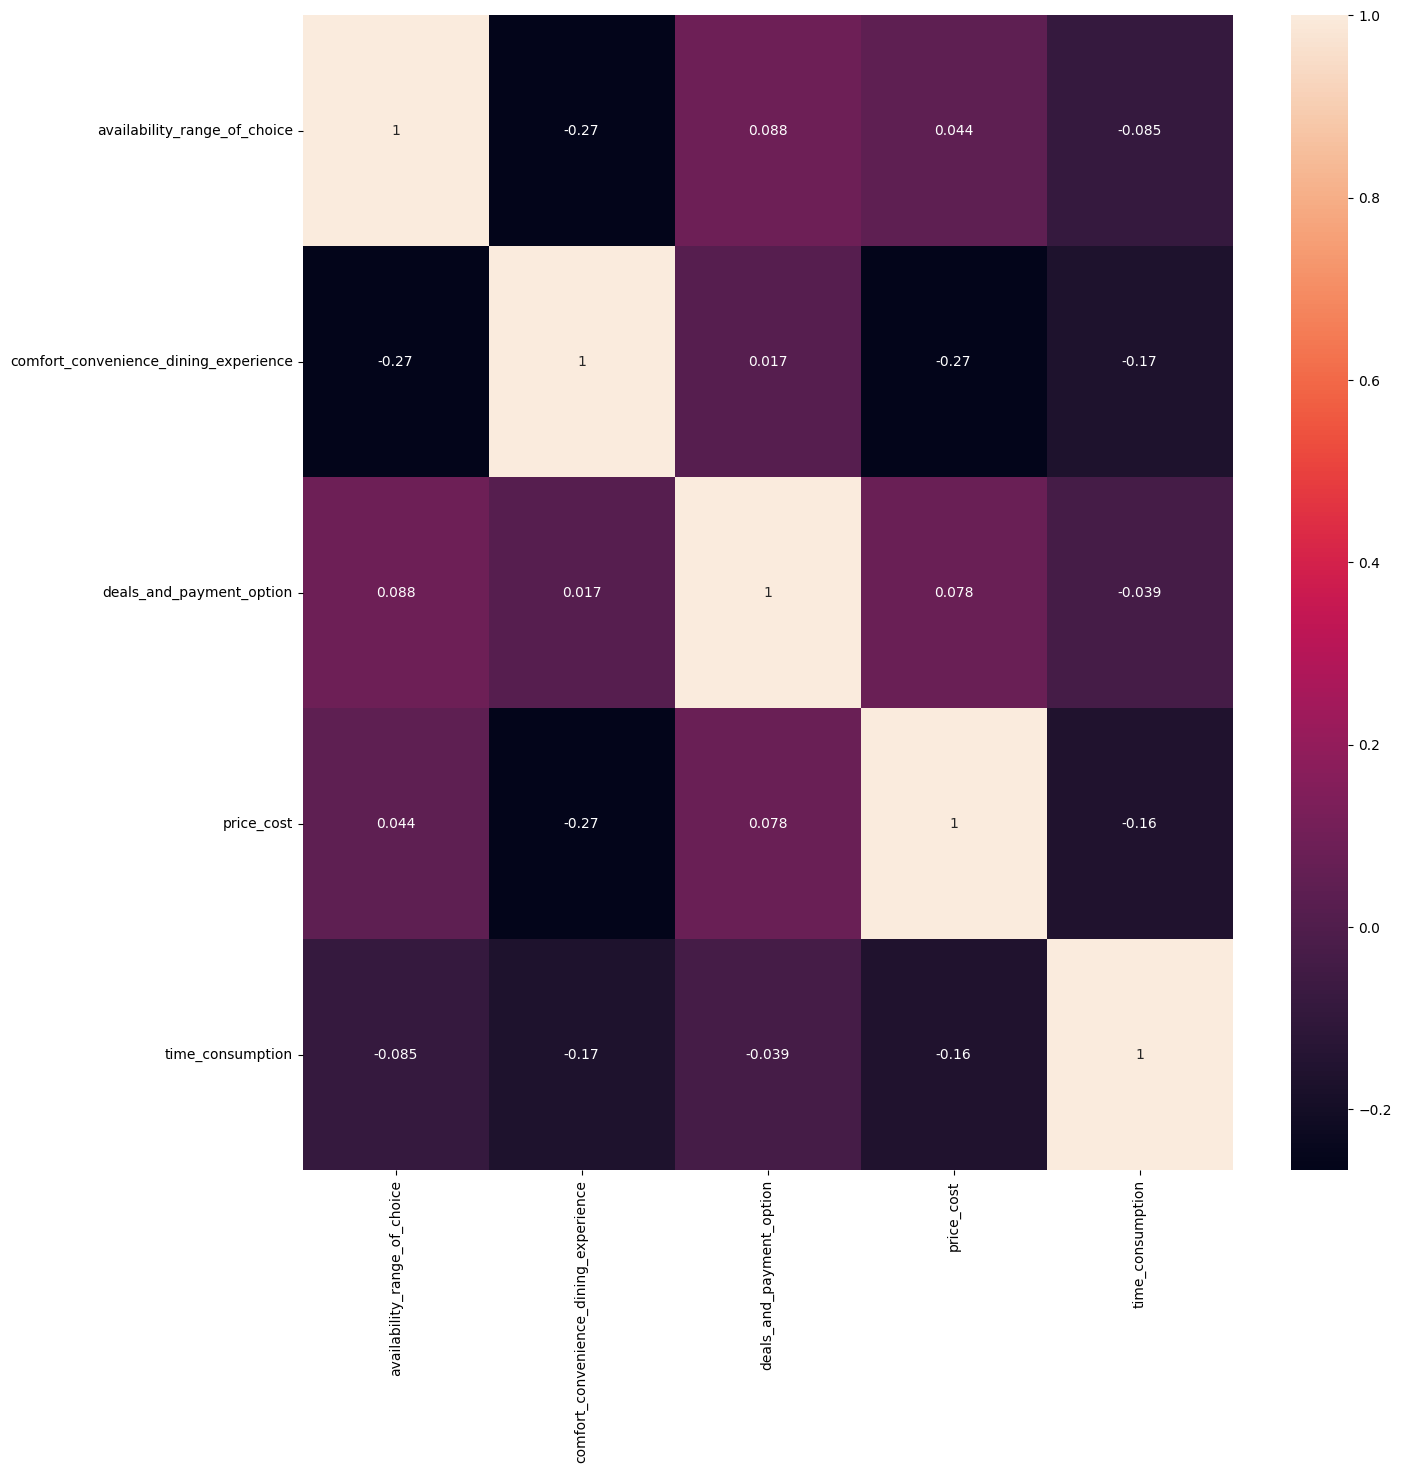

In [117]:
plt.figure(figsize=(15,15))
df_corr = df.corr()
df_reason_corr = df_corr[['availability_range_of_choice', 'comfort_convenience_dining_experience', 'deals_and_payment_option', 'price_cost', 'time_consumption']]
ax = sns.heatmap(df_reason_corr.loc[['availability_range_of_choice', 'comfort_convenience_dining_experience', 'deals_and_payment_option', 'price_cost', 'time_consumption']], annot=True)
plt.show()


##### Summary Graph 18 & 19
The most filled reason for people to prefer one to another is time consumption, availability/range of choice, comfort and convenience dining experience, deals and payment option, and price cost in order.
##### From the heatmap, we've gathered 10 values:
##### Weak positive correlation coefficient:
* Deals and payment option - Availability / range of choice
* Deals and payment option - Comfort and convenience dining experience
* Price cost - Availability / range of choice
* Price cost - Deals and payment option
##### Weak negative correlation coefficient:
* Time consumption - Availability / range of choice
* Time consumption - Deals and payment option
* Time consumption - Price cost
##### Fairly weak negative correlation coefficient::
* Comfort and convenience dining experience - Availability / range of choice
* Comfort and convenience dining experience - Price cost
* Comfort and convenience dining experience - Time consumption



##### Graph 20: availability_range_of_choice with their outputs

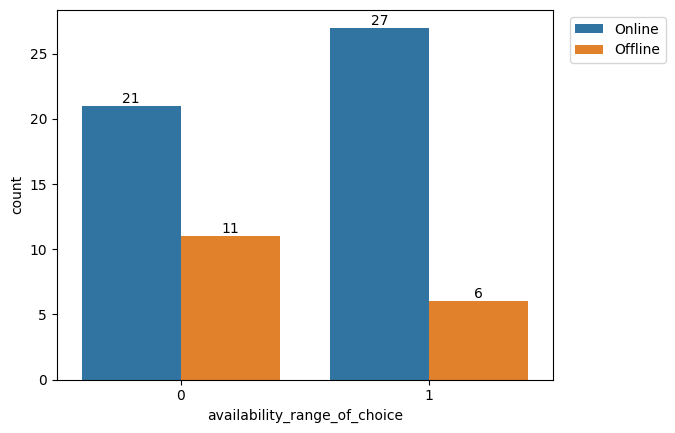

In [118]:
ax = sns.countplot(x=df_analyze['availability_range_of_choice'], hue=df_analyze['interest_output'])
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

##### Summary graph 20
survey-takers who choose availability/range of choice as their reason to the interest output tends to choose online delivery services rather than food takeout

##### Graph 21 & 22: The outputs

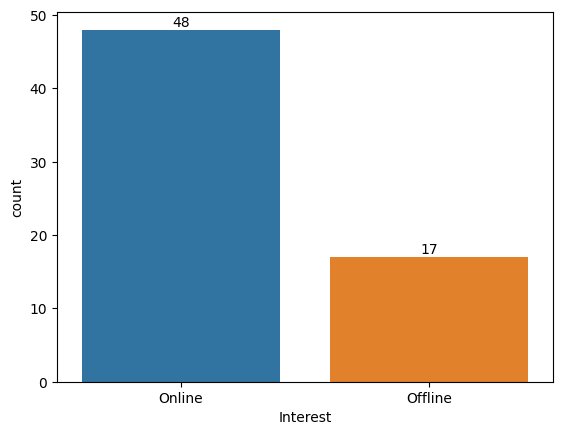

In [119]:
ax = sns.countplot(x=df_analyze['interest_output'])
ax.set(xlabel= 'Interest')
ax.bar_label(ax.containers[0])
plt.show()

It seems that people interest more in online food delivery services rather than food takeout. Let's see if they do spend more on it.

In [120]:
df_analyze['expense_output'].replace([0,1],['Online','Offline'], inplace= True)

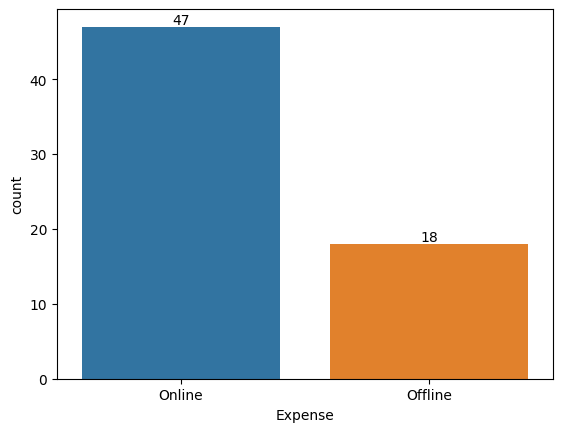

In [121]:
ax = sns.countplot(x=df_analyze['expense_output'])
ax.set(xlabel= 'Expense')
ax.bar_label(ax.containers[0])
plt.show()

##### Summary graph 21 & 22


Suprisingly, there isn't that much difference, does this mean people who prefer online food delivery services will always spend more on it and vice versa? Let's see it.

In [122]:
df_online_offline_difference = df_analyze.loc[(df_analyze['interest_output'] == 'Online') & (df_analyze['expense_output'] == 'Offline')]
# allowance_df = df.loc[df['allowance_permonth'] > 10000]
df_online_offline_difference[['interest_output', 'expense_output']]



,interest_output,expense_output
12,Online,Offline
21,Online,Offline
24,Online,Offline
39,Online,Offline
40,Online,Offline
53,Online,Offline


In [123]:
df_online_offline_difference = df_analyze.loc[(df_analyze['interest_output'] == 'Offline') & (df_analyze['expense_output'] == 'Online')]
# allowance_df = df.loc[df['allowance_permonth'] > 10000]
df_online_offline_difference[['interest_output', 'expense_output']]

,interest_output,expense_output
9,Offline,Online
10,Offline,Online
19,Offline,Online
22,Offline,Online
41,Offline,Online


There is 6 survey-takers who are interested in online food delivery services however spend more at food takeout. While there is 5 survey-takers who prefer food takeout however spend more on online food delivery services